In [136]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
import numpy as np

In [137]:
# Membuat Class Depo & Pelanggan
class Pelanggan:
    def __init__(self, id, kebutuhan, koordinat_x, koordinat_y):
        self.id = id
        self.kebutuhan = kebutuhan
        self.koordinat = (koordinat_x, koordinat_y)

class Depo_Air:
    def __init__(self,id,koordinat_x,koordinat_y):
        self.id = id
        self.koordinat = (koordinat_x, koordinat_y)

In [138]:
# Membuat Node
node_depo = random.sample(range(1, 14), 4)
pelanggan = []
node = np.empty([14], dtype=Pelanggan)

a = 1
b = 1

for i in range(0,14):
    if i in node_depo:
        node[i] = Depo_Air(f"depo air {a}",random.randint(-15,15),random.randint(-15,15))
        a+=1
    else:
        node[i] = Pelanggan(f"pelanggan {b}",random.randint(1,49),random.randint(-15,15),random.randint(-15,15))
        pelanggan.append(f"pelanggan {b}")
        b+=1

In [139]:
# Deklarasi Graph
G = nx.Graph()
a = 1
b = 1
labeling = {}
for i in range(14):
    G.add_node(node[i])
    if isinstance(node[i],Pelanggan):
        labeling[node[i]] = f"pelanggan {a}"
        a+=1
    else:
        labeling[node[i]] = f"depo air {b}"
        b+=1

G = nx.relabel_nodes(G,labeling)

In [140]:
# Membuat Edge
edge = list(itertools.permutations(G.nodes,2))
edge = [edge[i] for i in range(0,len(edge),6)]

for i in edge:
    G.add_edge(i[0],i[1],weight = random.randint(1,15))

In [141]:
# Create Position
position = {}
for i in range(14):
    position[node[i].id] = node[i].koordinat

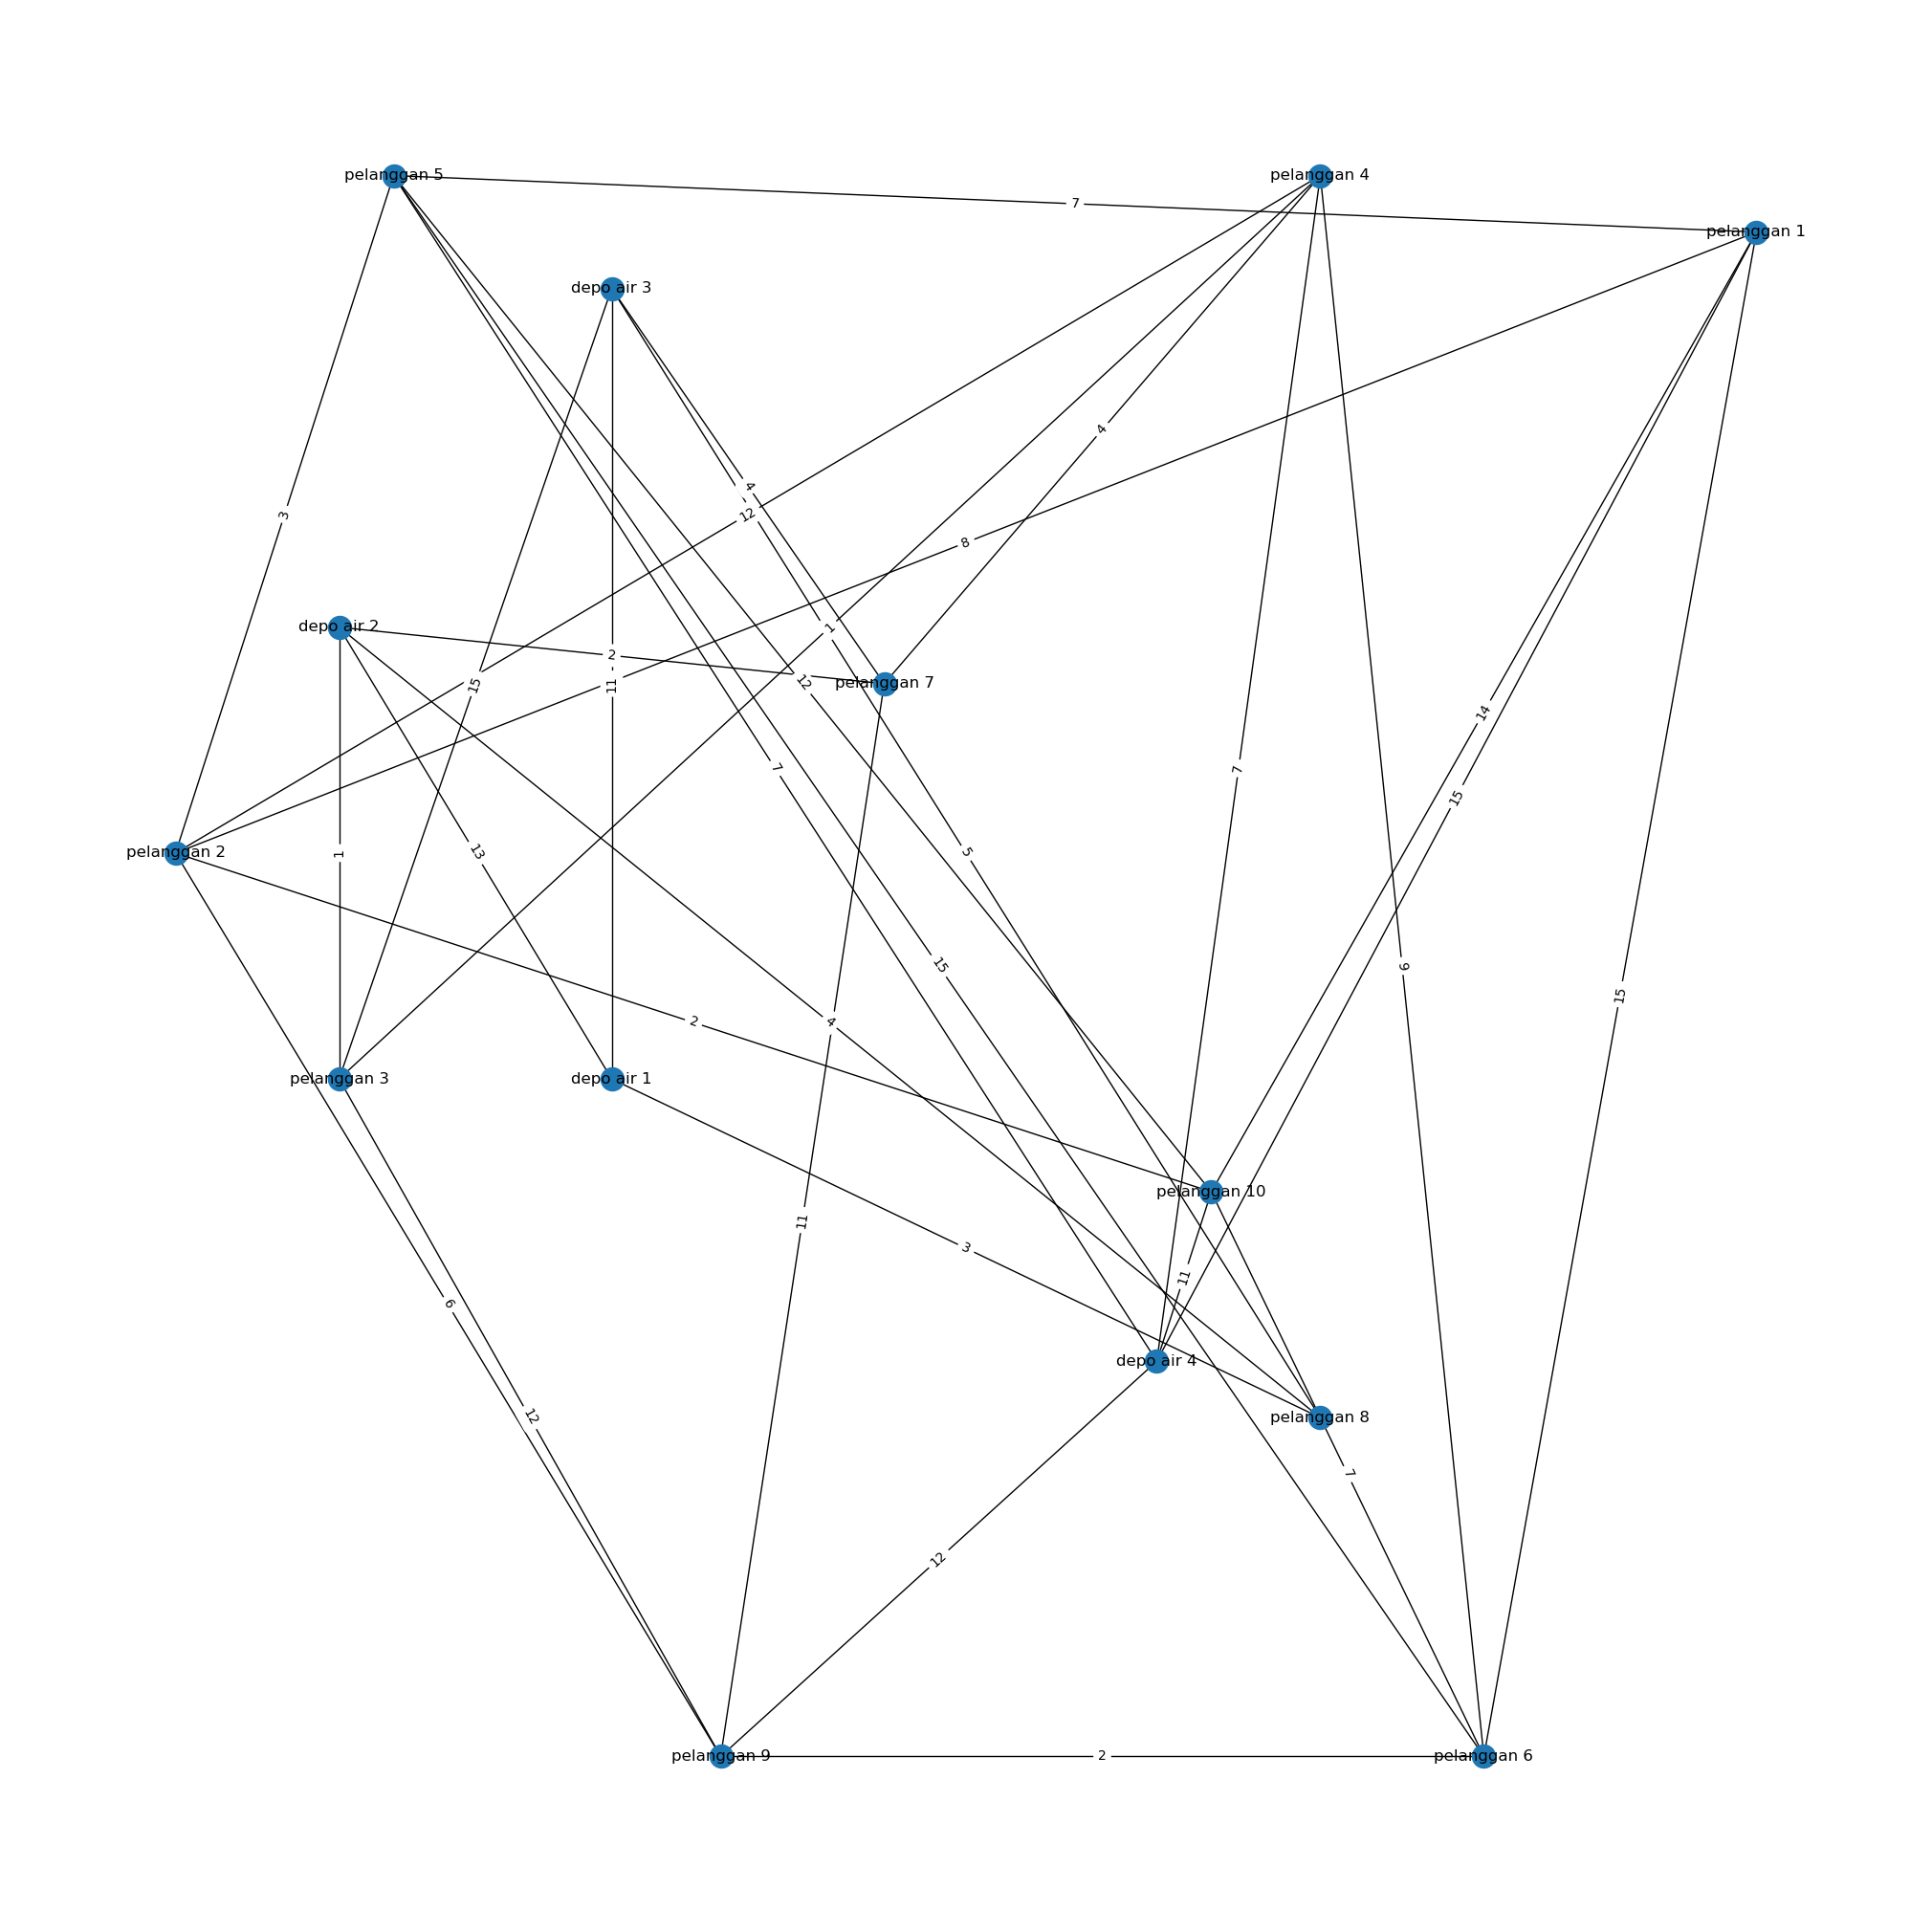

In [142]:
# Visualisasi Graph
plt.figure(figsize=(20,20))
nx.draw(G, position, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, position, edge_labels=labels)
plt.show()

In [143]:
# def cari_depo(start,path_maps):
#     path = sorted(G.edges(start,data=True), key=lambda edge: edge[2]['weight'])
#     for i in path:
#         if "isi ulang" in i[1]:
#             path_maps.append(f"-> reload di depo {i[1]} sisa galon = 50")
#             return i[1]        
#     print(path[0][1])
#     path_maps.append(f"->menuju depo lewat {path[0][1]}")
#     return cari_depo(path[0][1],path_maps)    

# def telusuri(start,galon,closed,path_maps):
#     current = start
#     # generate all posible path
#     path = sorted(G.edges(start,data=True), key=lambda edge: edge[2]['weight'])
#     if len(pelanggan) != 0:
#         for i in path:
#             if "isi ulang" not in i[1] and i[1] not in closed and galon >= kebutuhan[i[1]]:
#                 current = i[1] # memindahkan ke node yang bary
#                 closed.append(current) # menutup node yang pernah dikunjungi agar tidak diberikan galon lagi
#                 pelanggan.remove(i[1])
#                 galon -= kebutuhan[current]
#                 path_maps.append(f"->{current} weight {i[2]['weight']} sisa galon = {galon}")
#                 return telusuri(current,galon,closed,path_maps)
#         if start == current:
#             start = cari_depo(current,path_maps)
#             galon = 50
#             telusuri(start,galon,closed,path_maps)

# start = f"isi ulang {random.randint(1,4)}"
# galon = 50
# closed = []
# path_map = [start]
# cost = 0
# telusuri(start,galon,closed,path_map)
# path_map

In [144]:
def get_keys_from_value(dictionary, value):
    return list(filter(lambda x: dictionary[x] == value, dictionary))

def cari_pelanggan(start,path):
    pass


def cari_depo(start,path):
    calon_path = sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight'])
    # print(f"depo calon path {calon_path}")
    posible_path = [i[1] for i in calon_path if "depo air" in i[1]]
    if len(posible_path) == 0:
        posible_path = [i[1] for i in calon_path if "pelanggan" in i[1]]
        path.append(f"mencari depo melalui {posible_path[0]} --> ")
        # print(f"mencari depo melalui {posible_path[0]} --> ")
        current_node = get_keys_from_value(labeling,posible_path[0])
        # print(f"{current_node[0].id} {posible_path[0]}")
        # print(current_node[0].id)
        cari_depo(current_node[0],path)
    else:
        print(f"posible path {posible_path}")
        current_node = get_keys_from_value(labeling,posible_path[0])
        path.append(f"reload air di {posible_path[0]} --> ")
        # print(f"reload air di {posible_path[0]} --> ")
        print(f"curreant node {current_node[0]}")
        return current_node[0]
        
def telusuri(start,galon,closed,path):
    # generate all posible edge
    calon_path = sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight'])
    # mencari pelanggan yang belum diberi air dari calon path yang sudah digenerate
    posible_path = [i[1] for i in calon_path if i[1] in pelanggan]
    # print(f"posible path : {posible_path}")
    if len(posible_path) == 0:
        if len(pelanggan) == 0:
            return
        else:
            return
    else:
        current_node = 0
        for i in posible_path:
            # mencari key yang mana merupakan node berdasarkan nama labelingnya
            current_node = get_keys_from_value(labeling,i)
            id = current_node[0].id
            kebutuhan = current_node[0].kebutuhan
            if galon >= kebutuhan and id not in closed:
                closed.append(id)
                galon -= kebutuhan
                path.append(f"{id} sisa galon {galon} --> ")
                # print(f"di {id} kebutuhan {kebutuhan} sisa galon {galon} --> ")
                # print(f"{id} {pelanggan}")
                pelanggan.remove(id)
                telusuri(current_node[0],galon,closed,path)
        start = cari_depo(current_node[0],path)
        galon = 50
        if(isinstance(start,Depo_Air)):
            print("aman")
            telusuri(start,galon,closed,path)
        else:
            print("-----")
            print(start)
            print(type(start))
            pass
      
start = node[random.choice(node_depo)]
closed = []
path = [f"{start.id} --> "]
galon = 50
telusuri(start,galon,closed,path)

posible path ['depo air 4']
curreant node <__main__.Depo_Air object at 0x00000276C5801520>
-----
None
<class 'NoneType'>
posible path ['depo air 4']
curreant node <__main__.Depo_Air object at 0x00000276C5801520>
aman
posible path ['depo air 2', 'depo air 3']
curreant node <__main__.Depo_Air object at 0x00000276C57FD5B0>
aman
posible path ['depo air 1', 'depo air 2', 'depo air 3']
curreant node <__main__.Depo_Air object at 0x00000276C57FD520>
aman
posible path ['depo air 1', 'depo air 2', 'depo air 3']
curreant node <__main__.Depo_Air object at 0x00000276C57FD520>
aman
posible path ['depo air 4']
curreant node <__main__.Depo_Air object at 0x00000276C5801520>
aman
posible path ['depo air 4']
curreant node <__main__.Depo_Air object at 0x00000276C5801520>
aman
posible path ['depo air 4']
curreant node <__main__.Depo_Air object at 0x00000276C5801520>
aman
posible path ['depo air 4']
curreant node <__main__.Depo_Air object at 0x00000276C5801520>
aman
posible path ['depo air 4']
curreant node